In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Total_Renewable_Energy_Consumption_Monthly.csv to Total_Renewable_Energy_Consumption_Monthly.csv


In [3]:
%pwd

'/content'

In [4]:
%ls

sample_data/  Total_Renewable_Energy_Consumption_Monthly.csv


In [0]:
# cd ..

In [5]:
df = pd.read_csv('Total_Renewable_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df = df.sort_index()
df.head()

,Series ID: TOTAL.RETCBUS.M Trillion Btu
Month,
1973-01-01,403.981
1973-02-01,360.900
1973-03-01,400.161
1973-04-01,380.470
1973-05-01,392.141


In [6]:
df = df.reset_index()
df.head()

,Month,Series ID: TOTAL.RETCBUS.M Trillion Btu
0,1973-01-01,403.981
1,1973-02-01,360.900
2,1973-03-01,400.161
3,1973-04-01,380.470
4,1973-05-01,392.141


In [7]:
df.columns =['ds','y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
ds    548 non-null datetime64[ns]
y     548 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


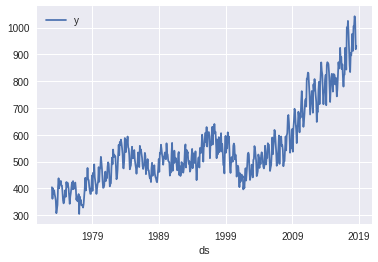

In [8]:
df.plot(x='ds',y='y')

In [0]:
# uncertainty interval to 95%
mymodel = Prophet(interval_width=0.95)

In [10]:
mymodel.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future_dates = mymodel.make_future_dataframe(periods=60, freq='MS')
future_dates.tail()

,ds
603,2023-04-01
604,2023-05-01
605,2023-06-01
606,2023-07-01
607,2023-08-01


In [13]:
forecast = mymodel.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
603,2023-04-01,1121.256422,1042.042942,1203.832012
604,2023-05-01,1148.728245,1069.688440,1227.360100
605,2023-06-01,1132.325621,1052.524802,1215.307996
606,2023-07-01,1125.606775,1046.238230,1210.066515
607,2023-08-01,1102.234476,1022.904992,1185.893704


In [14]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,1973-01-01,357.957242,357.957242,357.957242,317.326780,445.744460,24.987872,24.987872,24.987872,0.0,0.0,0.0,24.987872,24.987872,24.987872,382.945113
1,1973-02-01,358.882001,358.882001,358.882001,265.979015,390.570161,-32.456749,-32.456749,-32.456749,0.0,0.0,0.0,-32.456749,-32.456749,-32.456749,326.425252
2,1973-03-01,359.717267,359.717267,359.717267,319.804413,455.353823,29.776990,29.776990,29.776990,0.0,0.0,0.0,29.776990,29.776990,29.776990,389.494257
3,1973-04-01,360.642026,360.642026,360.642026,309.011938,435.505362,15.994633,15.994633,15.994633,0.0,0.0,0.0,15.994633,15.994633,15.994633,376.636660
4,1973-05-01,361.536955,361.536955,361.536955,335.390080,466.330526,42.065387,42.065387,42.065387,0.0,0.0,0.0,42.065387,42.065387,42.065387,403.602342
5,1973-06-01,362.461714,362.461714,362.461714,320.421823,452.514254,25.496292,25.496292,25.496292,0.0,0.0,0.0,25.496292,25.496292,25.496292,387.958006
6,1973-07-01,363.356642,363.356642,363.356642,311.598740,438.824621,12.914998,12.914998,12.914998,0.0,0.0,0.0,12.914998,12.914998,12.914998,376.271640
7,1973-08-01,364.281401,364.281401,364.281401,287.341783,411.499797,-14.628037,-14.628037,-14.628037,0.0,0.0,0.0,-14.628037,-14.628037,-14.628037,349.653365
8,1973-09-01,365.206161,365.206161,365.206161,236.841728,372.444401,-58.477746,-58.477746,-58.477746,0.0,0.0,0.0,-58.477746,-58.477746,-58.477746,306.728414
9,1973-10-01,366.101089,366.101089,366.101089,263.727937,388.382503,-38.736002,-38.736002,-38.736002,0.0,0.0,0.0,-38.736002,-38.736002,-38.736002,327.365086


In [15]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'yhat'],
      dtype='object')

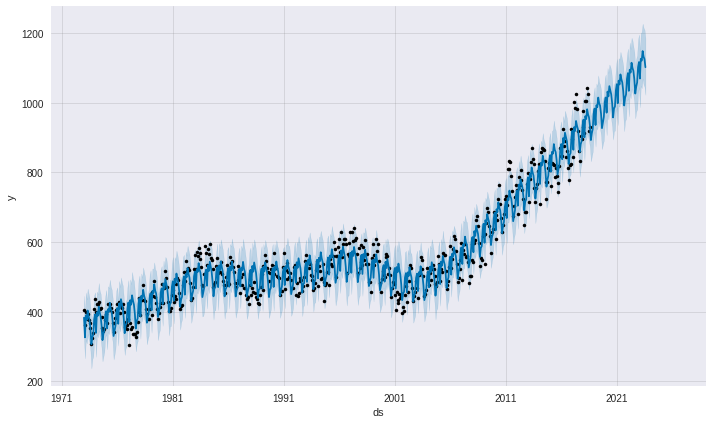

In [16]:
mymodel.plot(forecast,
              uncertainty=True)
plt.xlim(['1970','2029'])
plt.show()

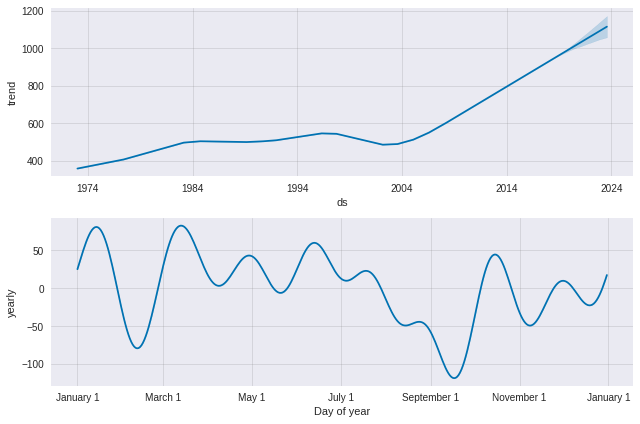

In [18]:
mymodel.plot_components(forecast)
plt.show()

In [19]:
pred = forecast[['ds','yhat']]
pred.head()

,ds,yhat
0,1973-01-01,382.945113
1,1973-02-01,326.425252
2,1973-03-01,389.494257
3,1973-04-01,376.636660
4,1973-05-01,403.602342


In [24]:
pred.head()

,yhat
ds,
1973-01-01,382.945113
1973-02-01,326.425252
1973-03-01,389.494257
1973-04-01,376.636660
1973-05-01,403.602342


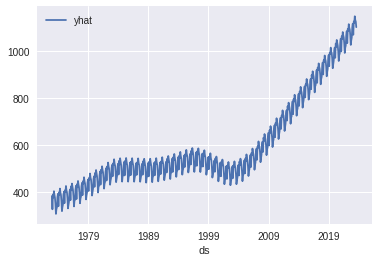

In [25]:
#pred = pred.set_index('ds',drop=True)
pred.plot()

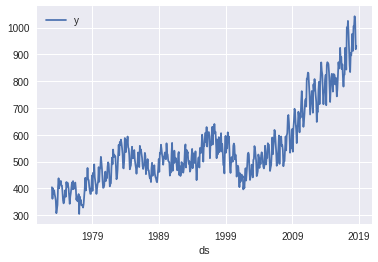

In [26]:
data = df.set_index('ds',drop=True)
data.plot()

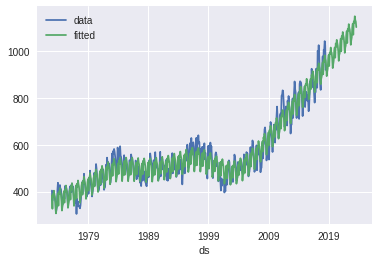

In [27]:
ax = data.plot()
pred.plot(ax=ax)
plt.legend(['data','fitted'])

In [0]:
from sklearn.metrics import mean_squared_error

In [29]:
import math
math.sqrt(mean_squared_error(data,pred.iloc[:len(data),:]))

33.171660525156504